# DSCI 525 - Web and Cloud Computing

***Milestone 4:*** In this milestone, you will deploy the machine learning model you trained in milestone 3.

Milestone 4 checklist :

- [ ] Use an EC2 instance.
- [ ] Develop your API here in this notebook.
- [ ] Copy it to ```app.py``` file in EC2 instance.
- [ ] Run your API for other consumers and test among your colleagues.
- [ ] Summarize your journey.

In [1]:
## Import all the packages that you need
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## 1. Develop your API

rubric={mechanics:45}

You probably got how to set up primary URL endpoints from the ```sampleproject.ipynb notebook``` and have them process and return some data. Here we are going to create a new endpoint that accepts a POST request of the features required to run the machine learning model that you trained and saved in last milestone (i.e., a user will post the predictions of the 25 climate model rainfall predictions, i.e., features,  needed to predict with your machine learning model). Your code should then process this data, use your model to make a prediction, and return that prediction to the user. To get you started with all this, I've given you a template which you should fill out to set up this functionality:

***NOTE:*** You won't be able to test the flask module (or the API you make here) unless you go through steps in ```2. Deploy your API```. However, here you can make sure that you develop all your functions and inputs properly.

```python
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# 1. Load your model here
model = joblib.load(...)

# 2. Define a prediction function
def return_prediction(...):

    # format input_data here so that you can pass it to model.predict()

    return model.predict(...)

# 3. Set up home page using basic html
@app.route("/")
def index():
    # feel free to customize this if you like
    return """
    <h1>Welcome to our rain prediction service</h1>
    To use this service, make a JSON post request to the /predict url with 5 climate model outputs.
    """

# 4. define a new route which will accept POST requests and return model predictions
@app.route('/predict', methods=['POST'])
def rainfall_prediction():
    content = request.json  # this extracts the JSON content we sent
    prediction = return_prediction(...)
    results = {...}  # return whatever data you wish, it can be just the prediction
                     # or it can be the prediction plus the input data, it's up to you
    return jsonify(results)
```

## 2. Deploy your API

rubric={mechanics:40}

Once your API (app.py) is working we're ready to deploy it! For this, do the following:

1. SSH into your EC2 instance from milestone2. There are no issues if you want to spin another EC2 instance; if you plan to do so, make sure you terminate any other running instances.
2. Make a file `app.py` file in your instance and copy what you developed above in there. 

    2.1 You can use the linux editor using ```vi```. More details on vi Editor [here](https://www.guru99.com/the-vi-editor.html). I do recommend doing it this way and knowing some basics like ```:wq,:q!,dd``` will help.
    
    2.2 Or else you can make a file in your laptop called app.py and copy it over to your EC2 instance using ```scp```. Eg: ```scp -r -i "ggeorgeAD.pem" ~/Desktop/worker.py  ubuntu@ec2-xxx.ca-central-1.compute.amazonaws.com:~/```

3. Download your model from s3 to your EC2 instance.
4. Presumably you already have `pip` or `conda` installed on your instance from your previous milestone. You should use one of those package managers to install the dependencies of your API, like `flask`, `joblib`, `sklearn`, etc.

    4.1. You have installed it in your TLJH using [Installing pip packages](https://tljh.jupyter.org/en/latest/howto/env/user-environment.html#installing-pip-packages). if you want to make it available to users outside of jupyterHub (which you want to in this case as we are logging into EC2 instance as user ```ubuntu``` by giving ```ssh -i privatekey ubuntu@<host_name>```) you can follow these [instructions](https://tljh.jupyter.org/en/latest/howto/env/user-environment.html#accessing-user-environment-outside-jupyterhub).
    
    4.2. Alternatively you can install the required packages inside your terminal.
        - Install conda:
            wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
            bash Miniconda3-latest-Linux-x86_64.sh
        - Install packages (there might be others): 
            conda install flask scikit-learn joblib

5. Now you're ready to start your service, go ahead and run `flask run --host=0.0.0.0 --port=8080`. This will make your service available at your EC2 instance's IP address on port 8080. Please make sure that you run this from where ```app.py``` and ```model.joblib``` resides.
6. You can now access your service by typing your EC2 instances public IPv4 address appened with `:8080` into a browswer, so something like `http://<your_EC2_ip>:8080`.
7. You should use `curl` to send a post request to your service to make sure it's working as expected.
>EG: curl -X POST http://your_EC2_ip:8080/predict -d '{"data":[1,2,3,4,53,11,22,37,41,53,11,24,31,44,53,11,22,35,42,53,12,23,31,42,53]}' -H "Content-Type: application/json"

8. Now, what happens if you exit your connection with the EC2 instance? Can you still reach your service?
9. There are several options we could use to help us persist our server even after we exit our shell session. We'll be using `screen`. `screen` will allow us to create a separate session within which we can run `flask` and which won't shut down when we exit the main shell session. Read [this](https://linuxize.com/post/how-to-use-linux-screen/) to learn more on ```screen```.
10. Now, create a new `screen` session (think of this as a new, separate shell), using: `screen -S myapi`. If you want to list already created sessions do ```screen -list```. If you want to get into an existing ```screen -x myapi```.
11. Within that session, start up your flask app. You can then exit the session by pressing `Ctrl + A then press D`. Here you are detaching the session, once you log back into EC2 instance you can attach it using ```screen -x myapi```.
12. Feel free to exit your connection with the EC2 instance now and try accessing your service again with `curl`. You should find that the service has now persisted!
13. ***CONGRATULATIONS!!!*** You have successfully got to the end of our milestones. Move to Task 3 and submit it.

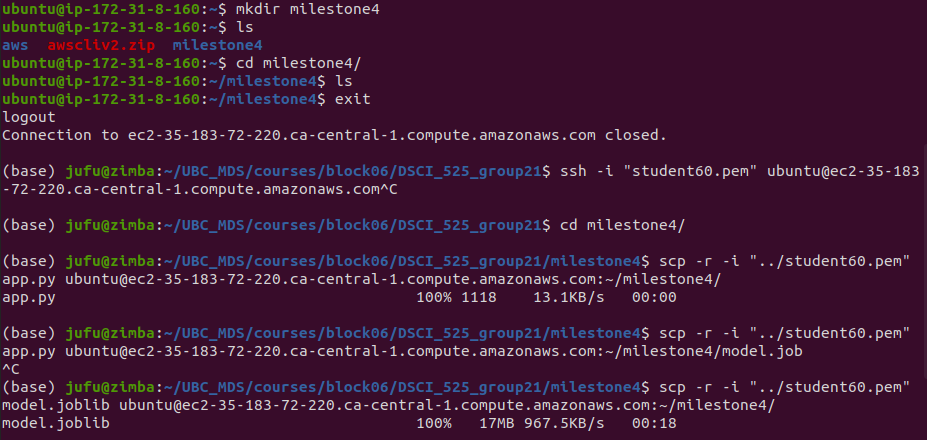

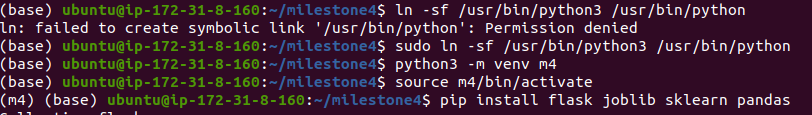

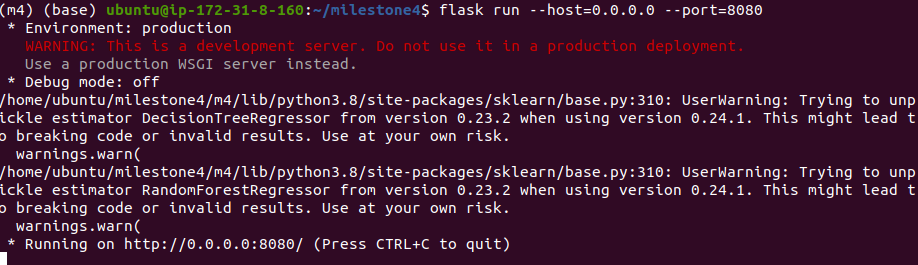


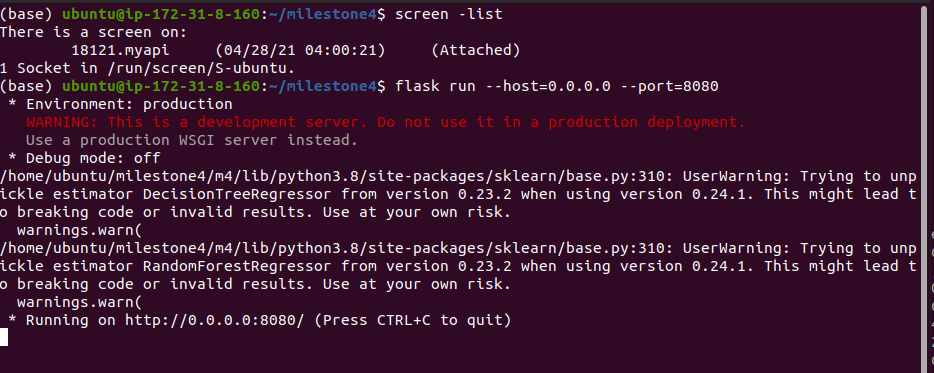

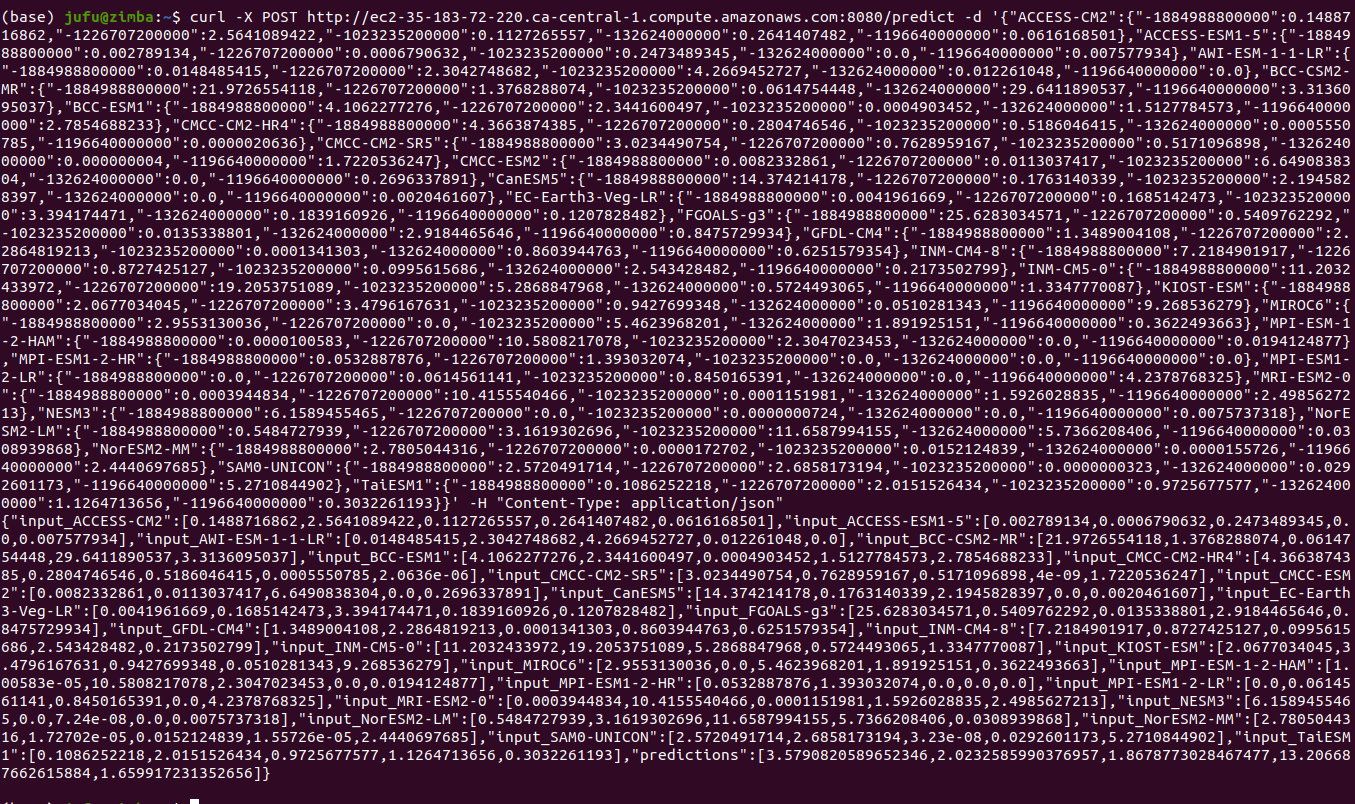


This is the CURL command we used:

curl -X POST http://ec2-35-183-72-220.ca-central-1.compute.amazonaws.com:8080/predict -d '{"ACCESS-CM2":{"-1884988800000":0.1488716862,"-1226707200000":2.5641089422,"-1023235200000":0.1127265557,"-132624000000":0.2641407482,"-1196640000000":0.0616168501},"ACCESS-ESM1-5":{"-1884988800000":0.002789134,"-1226707200000":0.0006790632,"-1023235200000":0.2473489345,"-132624000000":0.0,"-1196640000000":0.007577934},"AWI-ESM-1-1-LR":{"-1884988800000":0.0148485415,"-1226707200000":2.3042748682,"-1023235200000":4.2669452727,"-132624000000":0.012261048,"-1196640000000":0.0},"BCC-CSM2-MR":{"-1884988800000":21.9726554118,"-1226707200000":1.3768288074,"-1023235200000":0.0614754448,"-132624000000":29.6411890537,"-1196640000000":3.3136095037},"BCC-ESM1":{"-1884988800000":4.1062277276,"-1226707200000":2.3441600497,"-1023235200000":0.0004903452,"-132624000000":1.5127784573,"-1196640000000":2.7854688233},"CMCC-CM2-HR4":{"-1884988800000":4.3663874385,"-1226707200000":0.2804746546,"-1023235200000":0.5186046415,"-132624000000":0.0005550785,"-1196640000000":0.0000020636},"CMCC-CM2-SR5":{"-1884988800000":3.0234490754,"-1226707200000":0.7628959167,"-1023235200000":0.5171096898,"-132624000000":0.000000004,"-1196640000000":1.7220536247},"CMCC-ESM2":{"-1884988800000":0.0082332861,"-1226707200000":0.0113037417,"-1023235200000":6.6490838304,"-132624000000":0.0,"-1196640000000":0.2696337891},"CanESM5":{"-1884988800000":14.374214178,"-1226707200000":0.1763140339,"-1023235200000":2.1945828397,"-132624000000":0.0,"-1196640000000":0.0020461607},"EC-Earth3-Veg-LR":{"-1884988800000":0.0041961669,"-1226707200000":0.1685142473,"-1023235200000":3.394174471,"-132624000000":0.1839160926,"-1196640000000":0.1207828482},"FGOALS-g3":{"-1884988800000":25.6283034571,"-1226707200000":0.5409762292,"-1023235200000":0.0135338801,"-132624000000":2.9184465646,"-1196640000000":0.8475729934},"GFDL-CM4":{"-1884988800000":1.3489004108,"-1226707200000":2.2864819213,"-1023235200000":0.0001341303,"-132624000000":0.8603944763,"-1196640000000":0.6251579354},"INM-CM4-8":{"-1884988800000":7.2184901917,"-1226707200000":0.8727425127,"-1023235200000":0.0995615686,"-132624000000":2.543428482,"-1196640000000":0.2173502799},"INM-CM5-0":{"-1884988800000":11.2032433972,"-1226707200000":19.2053751089,"-1023235200000":5.2868847968,"-132624000000":0.5724493065,"-1196640000000":1.3347770087},"KIOST-ESM":{"-1884988800000":2.0677034045,"-1226707200000":3.4796167631,"-1023235200000":0.9427699348,"-132624000000":0.0510281343,"-1196640000000":9.268536279},"MIROC6":{"-1884988800000":2.9553130036,"-1226707200000":0.0,"-1023235200000":5.4623968201,"-132624000000":1.891925151,"-1196640000000":0.3622493663},"MPI-ESM-1-2-HAM":{"-1884988800000":0.0000100583,"-1226707200000":10.5808217078,"-1023235200000":2.3047023453,"-132624000000":0.0,"-1196640000000":0.0194124877},"MPI-ESM1-2-HR":{"-1884988800000":0.0532887876,"-1226707200000":1.393032074,"-1023235200000":0.0,"-132624000000":0.0,"-1196640000000":0.0},"MPI-ESM1-2-LR":{"-1884988800000":0.0,"-1226707200000":0.0614561141,"-1023235200000":0.8450165391,"-132624000000":0.0,"-1196640000000":4.2378768325},"MRI-ESM2-0":{"-1884988800000":0.0003944834,"-1226707200000":10.4155540466,"-1023235200000":0.0001151981,"-132624000000":1.5926028835,"-1196640000000":2.4985627213},"NESM3":{"-1884988800000":6.1589455465,"-1226707200000":0.0,"-1023235200000":0.0000000724,"-132624000000":0.0,"-1196640000000":0.0075737318},"NorESM2-LM":{"-1884988800000":0.5484727939,"-1226707200000":3.1619302696,"-1023235200000":11.6587994155,"-132624000000":5.7366208406,"-1196640000000":0.0308939868},"NorESM2-MM":{"-1884988800000":2.7805044316,"-1226707200000":0.0000172702,"-1023235200000":0.0152124839,"-132624000000":0.0000155726,"-1196640000000":2.4440697685},"SAM0-UNICON":{"-1884988800000":2.5720491714,"-1226707200000":2.6858173194,"-1023235200000":0.0000000323,"-132624000000":0.0292601173,"-1196640000000":5.2710844902},"TaiESM1":{"-1884988800000":0.1086252218,"-1226707200000":2.0151526434,"-1023235200000":0.9725677577,"-132624000000":1.1264713656,"-1196640000000":0.3032261193}}' -H "Content-Type: application/json"


> This is the response from the CURL command using a JSON viewer

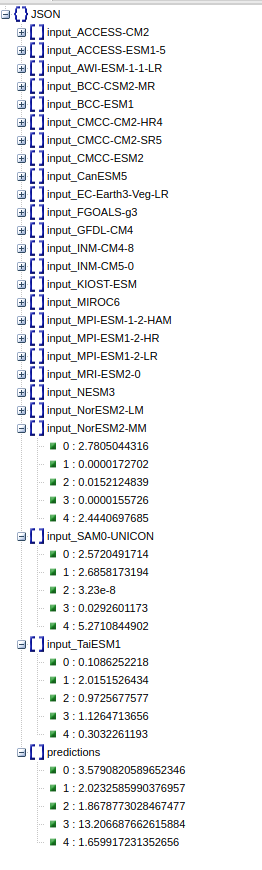

## 3. Summarize your journey from Milestone 1 to Milestone 4
rubric={mechanics:10}
>There is no format or structure on how you write this. (also, no minimum number of words).  It's your choice on how well you describe it.

- Milestone 1: Download data via API, combine CSVs and then practice loading it using different approaches to optimize load time. Then Store the data in using Feather file format which is a binary format that is optimized for load and save time. Then we used Arrow to load the data back in to R and perform some basic exploratory data analysis.

- Milestone 2: We setup an EC2 instance with JupyterHub, installed all necessary things needed for this unix server instance. Then setup our S3 bucket and access key/secret pairs. Moved the data to the wrangled data in milestone 1 to S3. Then get the data from S3 in the jupyter notebook read to be used for Milestone 3.

- Milestone 3: We setup an EMR cluster with Spark and JupyterHub. We used a proxy connection through Firefox which then enabled us to access JupyterHub on the EMR cluster. We developed a ML model using scikit-learn and then performed hyperparameter tuning using spark's MLLib.

- Milestone 4: We went back to our EC2 instance and developed a flask app JSON api to server our machine learning model that was stored in a joblib file. Once served in the JSON api, we can use curl to get predictions.



## 4. Submission instructions
rubric={mechanics:5}

In the textbox provided on Canvas please put a link where TAs can find the following-
- [ ] This notebook with solution to ```1 & 3```
- [ ] Screenshot from 
    - [ ] Output after trying curl. Here is a [sample](https://github.ubc.ca/MDS-2020-21/DSCI_525_web-cloud-comp_students/blob/master/Milestones/milestone4/images/curl_deploy_sample.png). This is just an example; your input/output doesn't have to look like this, you can design the way you like. But at a minimum, it should show your prediction value.